In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [133]:
df= pd.read_csv("C:/Users/Selam/Desktop/smiplilearn/capstone video/project p/googleplaystore.csv")

In [134]:
df.shape

(10841, 13)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [136]:
#Checking if there is null value
df.isna().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [137]:
#droping na value
df1=df.dropna()

In [138]:
#checking
df1.isna().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [139]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [140]:
#Remove the k and M at the end.Changing the megabyte to kilobyte. Change to appropriate data type
df1["size"] = [(float(i.split('M')[0])) if 'M' in i else float(0) for i in df1["Size"]]

<ipython-input-140-96f13594b781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["size"] = [(float(i.split('M')[0])) if 'M' in i else float(0) for i in df1["Size"]]


In [141]:
#change to Megabyte to Kilobyte
df1["size"]= 1000*df1["size"]


<ipython-input-141-8c9690b22c47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["size"]= 1000*df1["size"]


In [142]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,2600.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,53000.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3600.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.0


In [143]:
#Taking out the k in Kilobyte so that we can change the data type to float
df1["Size"] = [(float(i.split('k')[0])) if 'k' in i else float(0) for i in df1["Size"]]


<ipython-input-143-5c2b380f9ff5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Size"] = [(float(i.split('k')[0])) if 'k' in i else float(0) for i in df1["Size"]]


In [144]:
df1['Size'].unique()

array([  0. , 201. ,  23. ,  79. , 118. , 695. , 556. , 526. , 334. ,
       232. , 624. ,   8.5,  41. , 292. , 704. , 862. , 899. , 378. ,
       266. , 375. , 975. , 980. , 696. , 544. , 525. , 920. , 779. ,
       853. , 720. , 713. , 772. , 318. ,  58. , 241. , 196. , 857. ,
        51. , 953. , 865. , 251. , 930. , 540. , 313. , 746. , 203. ,
        26. , 314. , 239. , 371. , 220. , 730. , 756. ,  91. , 293. ,
        17. ,  74. ,  14. , 317. ,  78. , 924. , 818. ,  81. , 939. ,
       169. ,  45. , 965. , 545. ,  61. , 283. , 655. , 714. ,  93. ,
       872. , 121. , 322. , 976. , 206. , 954. , 444. , 717. , 210. ,
       609. , 308. , 306. , 175. , 350. , 383. , 454. ,  70. , 812. ,
       442. , 842. , 417. , 412. , 459. , 478. , 335. , 782. , 721. ,
       430. , 429. , 192. , 460. , 728. , 496. , 816. , 414. , 506. ,
       887. , 613. , 778. , 683. , 592. , 186. , 840. , 647. , 373. ,
       437. , 598. , 716. , 585. , 982. , 219. ,  55. , 323. , 691. ,
       511. , 951. ,

In [145]:
#replacing the zeros with the values of size in Kilobyte
df1.loc[df1['size']== (df1.size =="0.0"), 'size']= (df1["Size"])
df1.tail(60)

C:\Users\Selam\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
10754,SCM FPS Status,BUSINESS,4.2,123,0.0,"10,000+",Free,0,Everyone,Business,"April 28, 2018",3.5,2.3 and up,3300.0
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676.0,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up,676.0
10756,FreedomPop Friends for Free Data,TOOLS,4.4,58,0.0,"5,000+",Free,0,Everyone,Tools,"July 24, 2018",2017.07.24,4.1 and up,2500.0
10757,Fisher-Price® Smart Connect™,TOOLS,2.7,422,0.0,"50,000+",Free,0,Everyone,Tools,"February 23, 2018",2.4.1,4.4 and up,72000.0
10758,Fingerprint Lock Screen Prank,TOOLS,4.1,10786,0.0,"1,000,000+",Free,0,Everyone,Tools,"December 9, 2017",5.0,4.0 and up,4300.0
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,0.0,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,2400.0
10763,FP Разбитый дисплей,FAMILY,4.5,922,552.0,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up,552.0
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,0.0,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,0.0
10766,FreedomPop Diagnostics,TOOLS,2.9,452,0.0,"100,000+",Free,0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up,7000.0
10767,NFP 2018,EVENTS,4.8,8,0.0,500+,Free,0,Everyone,Events,"January 9, 2018",1.0.3,4.2 and up,16000.0


In [146]:
df1.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,0.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5600.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,0.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19000.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,0.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29000.0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,0.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33000.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,0.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3100.0


In [147]:
#droping the Size column we don't need. We have size column that we copied and transformed in consistent format
df1.drop(columns= 'Size',inplace = True)

C:\Users\Selam\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [148]:
df1['size'].unique()
df1.loc[df1['size']== (df1.size =="0.0"), 'size']= (df1["size"]).mean()
df1['size']= df1['size'].round(1)

C:\Users\Selam\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-148-b6f879a2c808>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['size']= df1['size'].round(1)


In [149]:
df1.head(50)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5600.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19000.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29000.0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33000.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3100.0


In [150]:
#changing price data type and removing $ sign

df1['Price']= df1['Price'].str.replace('$','')
df1['Price']= df1['Price'].astype(float)


<ipython-input-150-65d1e0e02f97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price']= df1['Price'].str.replace('$','')
<ipython-input-150-65d1e0e02f97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price']= df1['Price'].astype(float)


In [151]:
df1['Price'].dtypes
df1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [152]:
#Convert reviews to numeric (int/float) because it is numeric value
df1['Reviews'] = df1['Reviews'].astype(int)
df1['Reviews'].dtypes


<ipython-input-152-2095381a3187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'] = df1['Reviews'].astype(int)


dtype('int32')

In [153]:
#Remove + and , sign from Installs column and change it to numeric value
df1['Installs']= df1['Installs'].str.replace('+','')
df1['Installs']= df1['Installs'].str.replace(',','')


<ipython-input-153-70fe39694ee9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs']= df1['Installs'].str.replace('+','')
<ipython-input-153-70fe39694ee9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs']= df1['Installs'].str.replace(',','')


In [154]:
df1['Installs'] = df1['Installs'].astype(int)
df1['Installs'].unique()

<ipython-input-154-21989c555efe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs'] = df1['Installs'].astype(int)


array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [155]:
#Sanity check
#Average rating should be between 1 and 5

df1.drop(df1[(df1['Rating'] < 1) & (df1['Rating'] > 5)].index,inplace= True)
df1['Rating'].unique()

C:\Users\Selam\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [156]:
#Reviews should not be more than installs as only those who installed can review the app. 
df1.drop(df1[df1['Installs'] < df1['Reviews']].index,inplace= True)

C:\Users\Selam\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [157]:
df1['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [158]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
df1.drop(df1[(df1['Type']== "Free") & (df1['Price'] > 0)].index,inplace= True)


C:\Users\Selam\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='Price'>

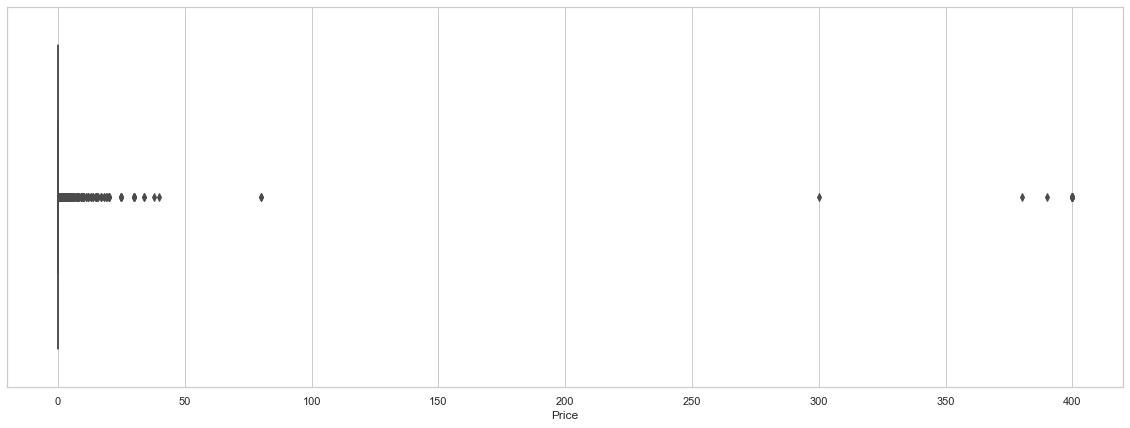

In [159]:
#Performing univariate analysis
#price
sns.set_theme(style="whitegrid")
plt.figure(figsize= [20,7])
sns.boxplot(x= df1['Price'])

#There are outliers on the price. 

<AxesSubplot:xlabel='Reviews'>

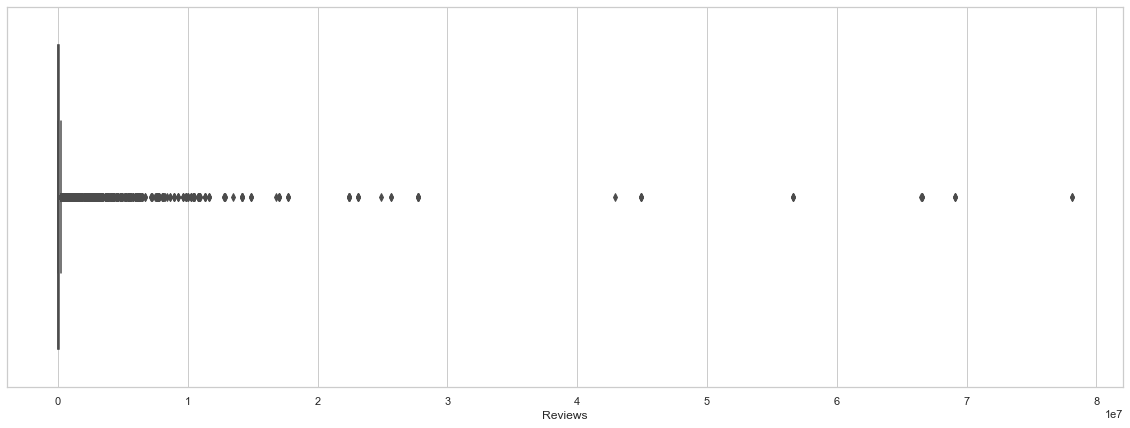

In [160]:
#Reviews
sns.set_theme(style="whitegrid")
plt.figure(figsize= [20,7])
sns.boxplot(x= df1['Reviews'])
#Reviews have outliers
#There are apps with very high reviews. Yes, the numbers of the review can be real.  

<AxesSubplot:xlabel='Rating', ylabel='Count'>

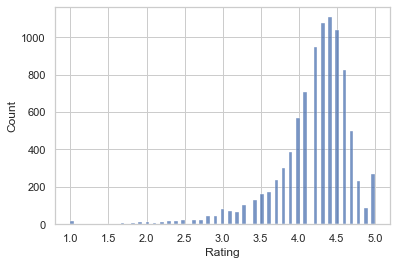

In [161]:
#Histogram for Rating
sns.histplot(x= df1['Rating'])
#The distribution of rating is skewed toward the higer side (right side). It doesn't seem it have outliers. 

<AxesSubplot:xlabel='size', ylabel='Count'>

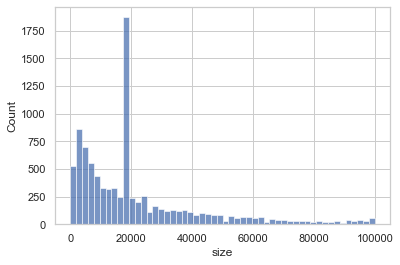

In [162]:
#Histogram for size
sns.histplot(x=df1['size'])
# The distibution of size is skewed toward the smaller side(left side). It also have outliers.

<AxesSubplot:xlabel='Installs', ylabel='Count'>

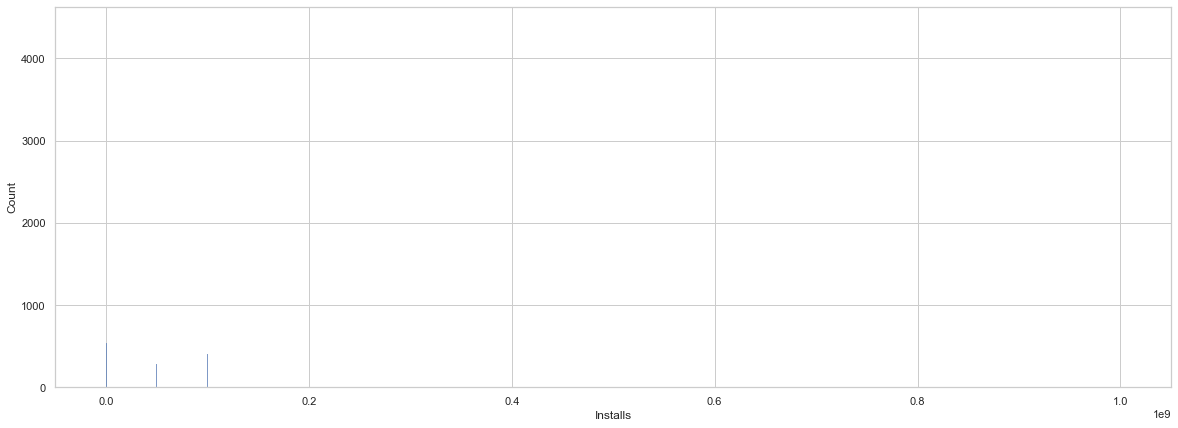

In [163]:
#installs
sns.set_theme(style="whitegrid")
plt.figure(figsize= [20,7])
sns.histplot(x=df1['Installs'])

In [164]:
#treating outliers. Droping price that are greater than 200
df2= df1.drop(df1[df1['Price'] > 200].index)

In [165]:
#Treating outliers by droping reviews greater than 2 million. 
df3= df2.drop(df2[df2['Reviews'] > 2000000].index)

In [166]:
df3.Installs.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

<AxesSubplot:xlabel='Installs', ylabel='Count'>

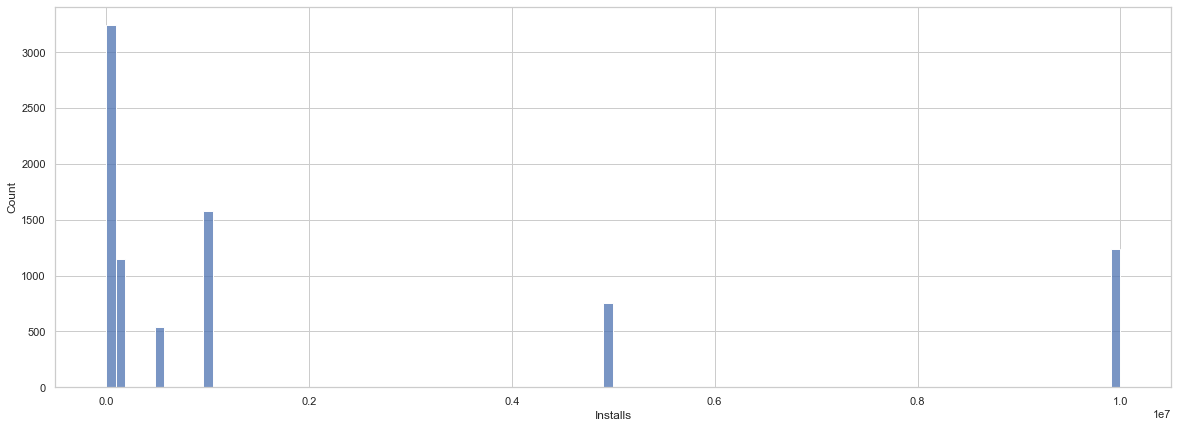

In [167]:
#cutting off at 95 percentile
df4= df3.drop(df3[df3['Installs']>10000000].index)
sns.set_theme(style="whitegrid")
plt.figure(figsize= [20,7])
sns.histplot(x=df4['Installs'])

<AxesSubplot:xlabel='Installs', ylabel='Count'>

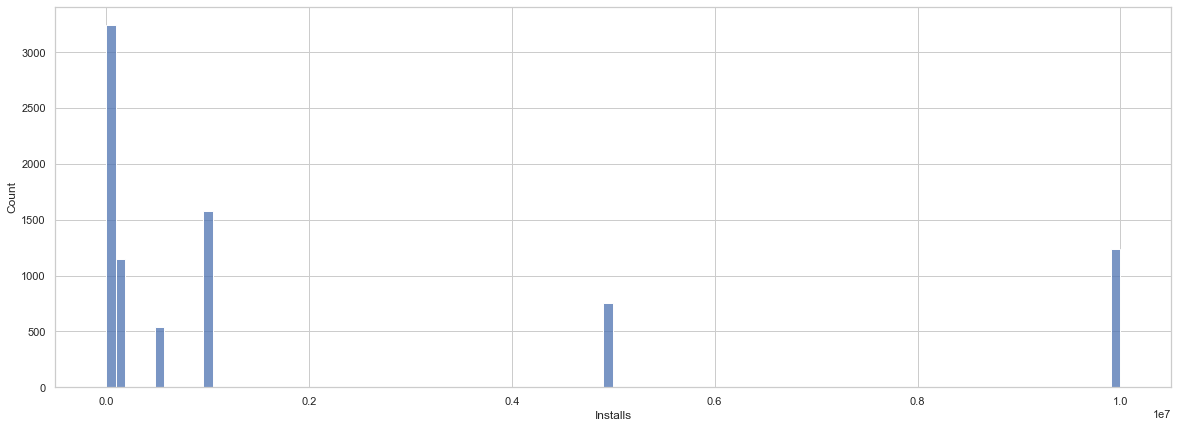

In [169]:
#cutting off at 95 percentile
df4= df3.drop(df3[df3['Installs']>10000000].index)
sns.set_theme(style="whitegrid")
plt.figure(figsize= [20,7])
sns.histplot(x=df4['Installs'])

<AxesSubplot:xlabel='Rating', ylabel='Price'>

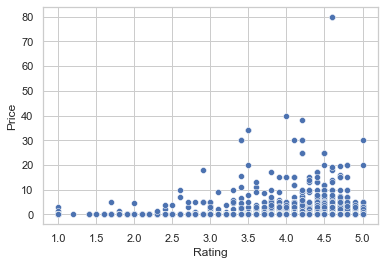

In [170]:
#Bivariate analysis
#scatter plot for Rating vs. Price. Does rating increase with price?

sns.scatterplot(data= df4, x='Rating', y= 'Price')
#The distribution is skewed to right. It seems like the rating increasing with price. 

<AxesSubplot:xlabel='Rating', ylabel='size'>

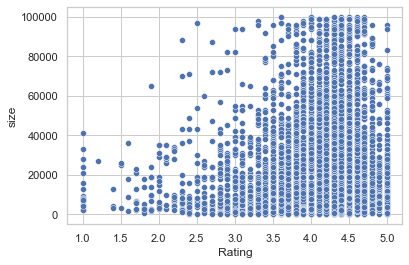

In [171]:
#scatter plot for Rating vs. Size. Are heavier apps rated better?
sns.scatterplot(data= df4,x='Rating',y= 'size')
#Heaver apps are rated better.

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

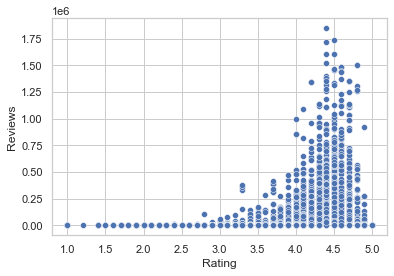

In [172]:
#scatter plot for Rating vs. Reviews. 
sns.scatterplot(data= df4,x= 'Rating',y='Reviews')
#As rating goes up as the reviews are goes up.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

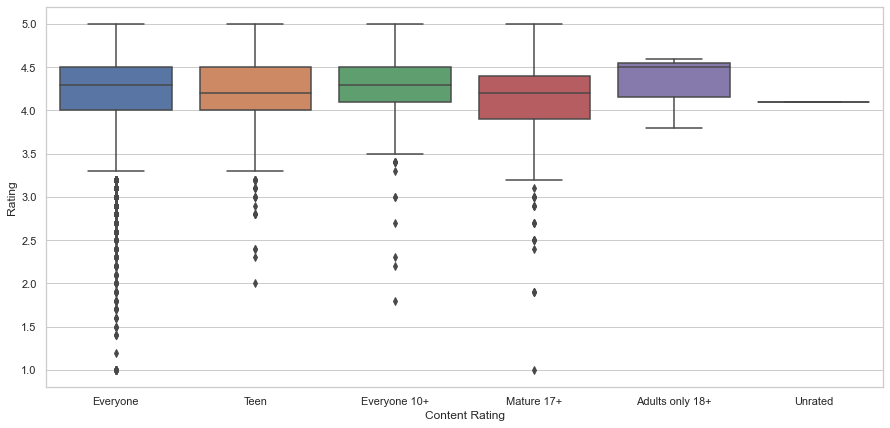

In [173]:
#Make boxplot for Rating vs. Content Rating
plt.figure(figsize= [15,7])
sns.boxplot(data= df4, x= 'Content Rating',y= 'Rating')
#It seems like mature 17+ group rated lower than the other group and 18+ group rated little higher than the other group. 

<AxesSubplot:xlabel='Category', ylabel='Rating'>

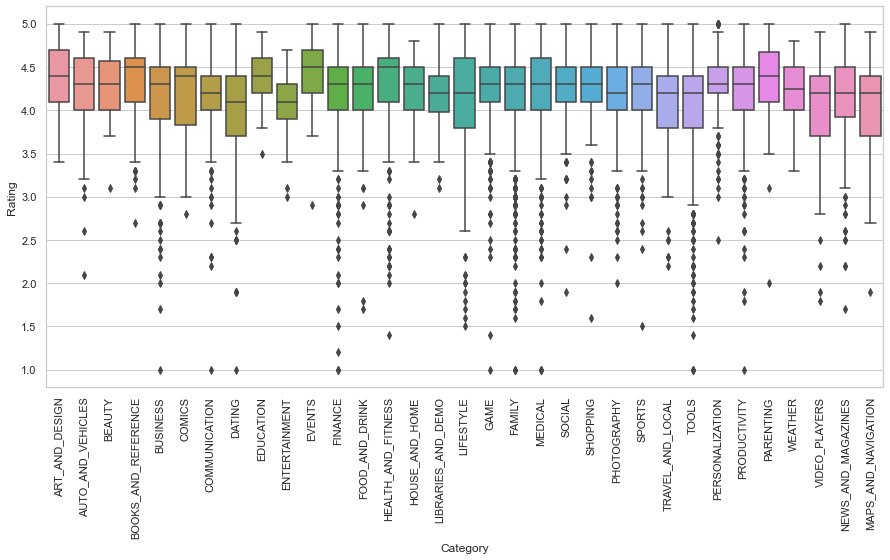

In [174]:
#Is there any difference in the ratings? Are some types liked better? Make boxplot for Ratings vs. Category.Which genre has the best ratings?

plt.figure(figsize= [15,7])
plt.xticks(rotation= 'vertical')
sns.boxplot(data=df4,y= 'Rating',x='Category')
#Some categories are rated better than others. Art and design,events and parenting are categories that are rated the highest. 


In [175]:
df5= df4.copy() 


In [176]:
#reduce the skewness
df5['Reviews'] = np.log1p(df5['Reviews'])

In [177]:
#reduce the skewness
df5['Installs'] = np.log1p(df5['Installs'])

In [178]:
#droping columns we don't need
df5.drop(["Last Updated","Current Ver","Android Ver","App",'Category'],axis=1,inplace=True)

In [179]:
#Dummy encoding
df5

,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,size
0,4.1,5.075174,9.210440,Free,0.0,Everyone,Art & Design,19000.0
1,3.9,6.875232,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,4.7,11.379520,15.424949,Free,0.0,Everyone,Art & Design,8700.0
4,4.3,6.875232,11.512935,Free,0.0,Everyone,Art & Design;Creativity,2800.0
5,4.4,5.123964,10.819798,Free,0.0,Everyone,Art & Design,5600.0
...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,6.216606,Free,0.0,Everyone,Education,2600.0
10836,4.5,3.663562,8.517393,Free,0.0,Everyone,Education,53000.0
10837,5.0,1.609438,4.615121,Free,0.0,Everyone,Education,3600.0
10839,4.5,4.744932,6.908755,Free,0.0,Mature 17+,Books & Reference,18953.1


In [180]:
colnames= ["Type","Content Rating","Genres"]
df6= pd.get_dummies(df5, columns= colnames,drop_first=True)
df6

,Rating,Reviews,Installs,Price,size,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,9.210440,0.0,19000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,13.122365,0.0,14000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,15.424949,0.0,8700.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,11.512935,0.0,2800.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,10.819798,0.0,5600.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,6.216606,0.0,2600.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,8.517393,0.0,53000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,4.615121,0.0,3600.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,4.744932,6.908755,0.0,18953.1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
df_train, df_test = train_test_split(df6, train_size = 0.7, random_state = 100)

y_train = df_train.pop("Rating")
x_train = df_train

y_test = df_test.pop("Rating")
x_test = df_test



In [182]:
y_train.dtypes
x_train.dtypes
x_test.dtypes
x_train.dtypes

Reviews                                         float64
Installs                                        float64
Price                                           float64
size                                            float64
Type_Paid                                         uint8
                                                 ...   
Genres_Video Players & Editors                    uint8
Genres_Video Players & Editors;Creativity         uint8
Genres_Video Players & Editors;Music & Video      uint8
Genres_Weather                                    uint8
Genres_Word                                       uint8
Length: 124, dtype: object

In [183]:
model= LinearRegression()
model.fit(x_train,y_train)

y_train_pred= model.predict(x_train)
r2_score(y_train, y_train_pred)


0.15928698705151967

In [184]:
y_test_pred=model.predict(x_test)
r2_score(y_test,y_test_pred)

0.1446870532852922

In [186]:
#We can say that ~ 14.46% of the variation of the Rating is explained by this simple linear model 